In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [10]:
df = pd.read_csv("Titanic-Dataset-1.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     885 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        884 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,846,0.0,3,"Abbing, Mr. Anthony",male,42.0,0,0.0,C.A. 5547,7.55,NaN,S
1,747,0.0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1.0,C.A. 2673,20.25,NaN,S
2,280,1.0,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1.0,C.A. 2673,20.25,NaN,S
3,309,0.0,2,"Abelson, Mr. Samuel",male,30.0,1,0.0,P/PP 3381,24.00,NaN,C
4,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0.0,P/PP 3381,24.00,NaN,C


In [11]:
print("Number of missing data in columns with null values:\n")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of missing data in columns with null values:

Survived      6
Age         177
Parch         7
Cabin       687
Embarked      2
dtype: int64


In [12]:
total_rows = len(df)
print(df.isnull().sum()[df.isnull().sum() > 0] / total_rows * 100)

Survived     0.673401
Age         19.865320
Parch        0.785634
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [13]:
df = df.drop('Cabin', axis = 1)
print(df.isnull().sum()[df.isnull().sum() > 0] / total_rows * 100)

Survived     0.673401
Age         19.865320
Parch        0.785634
Embarked     0.224467
dtype: float64


In [14]:
df = df.dropna(subset = ['Survived', 'Parch', 'Embarked'])

median_ages = df.groupby(['Pclass', 'Sex'])['Age'].median().to_dict()

def median_age(row):
    if pd.isna(row['Age']):
        return median_ages.get((row['Pclass'], row['Sex']))
    return row['Age']

df['Age'] = df.apply(median_age, axis = 1)
df = df.drop(columns = ['PassengerId', 'Ticket', 'Name'])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C':1, 'Q': 2})

df.info()
print(df.isnull().sum()[df.isnull().sum() > 0] / total_rows * 100)

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    float64
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    int64  
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    float64
 6   Fare      876 non-null    float64
 7   Embarked  876 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 61.6 KB
Series([], dtype: float64)


In [15]:
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Outliers for {col}:")
    print(f"Q1: {q1}, Q3: {q3}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    [col].values}")

fare_upper_bound = 30.6958 + 1.5 * (30.6958 - 7.8958)
df.loc[df['Fare'] > fare_upper_bound, 'Fare'] = fare_upper_bound
print(f"\n\n\nCapped Fare values above {fare_upper_bound}")

Outliers for Age:
Q1: 21.5, Q3: 36.0
Lower Bound: -0.25, Upper Bound: 57.75
Outliers: [63.  71.  80.  58.  60.  70.5 59.  70.  65.  64.  60.  58.  62.  58.
 58.  65.  70.  58.  64.  61.  65.  59.  62.  61.  74.  63.  61.  60.
 60.  66.  62. ]
Outliers for SibSp:
Q1: 0.0, Q3: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Outliers: [4 4 4 4 4 4 4 4 3 3 3 3 5 5 5 5 5 3 3 3 3 3 3 3 4 4 4 4 4 3 4 4 4 4 8 8 8
 8 8 8 8 3 3 3 3]
Outliers for Parch:
Q1: 0.0, Q3: 0.0
Lower Bound: 0.0, Upper Bound: 0.0
Outliers: [1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 5. 5. 2. 2. 2. 5. 1. 1. 1. 3. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 3. 3. 2. 2. 2.
 4. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 6. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2.
 1. 1. 1. 1. 3. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 4. 1.
 1. 1. 1. 1. 5. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 5. 1. 1. 3. 1. 

In [16]:
import seaborn as sns

survival_rate = df['Survived'].mean()
print(f"Survival Rate : {survival_rate: .2%}")

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Embarked', 'Pclass']

for col in numerical_cols:
    plt.figure(figsize = (4,4))
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in categorical_cols:
    plt.figure(figsize = (4,4))
    sns.countplot(x = col, data = df)
    plt.title(f"Frequency of {col}")
    plt.show()

ModuleNotFoundError: No module named 'seaborn'

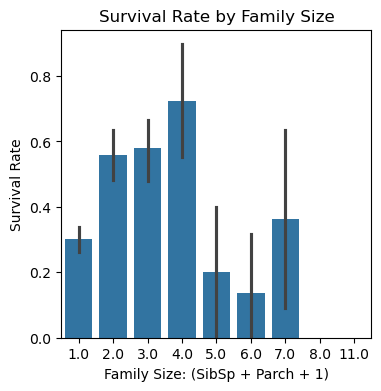

In [9]:
# Hypothesis: Passengers traveling alone had a lower survival rate than those with small families

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize = (4,4))
sns.barplot(x = 'FamilySize', y = 'Survived', data = df)
plt.title("Survival Rate by Family Size")
plt.xlabel('Family Size: (SibSp + Parch + 1)')
plt.ylabel('Survival Rate')
plt.show()

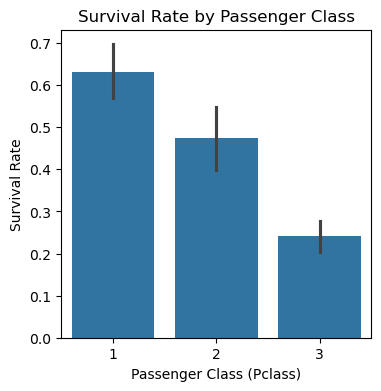

In [10]:
# Hypothesis: Higher class/expensive tickets lead to higher survival rates for both solo and family passengers
# Group by Pclass and IsAlone, calculate survival rates
'''
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

family_size = df.groupby(['Pclass', 'IsAlone'])['Survived'].mean().reset_index()

print("Survival Rates by Pclass and IsAlone")
print(family_size)
'''
plt.figure(figsize = (4,4))
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    876 non-null    float64
 1   Pclass      876 non-null    int64  
 2   Sex         876 non-null    int64  
 3   Age         876 non-null    float64
 4   SibSp       876 non-null    int64  
 5   Parch       876 non-null    float64
 6   Fare        876 non-null    float64
 7   Embarked    876 non-null    int64  
 8   FamilySize  876 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 68.4 KB


Logistic Regression Performance
Accuracy: 0.8239
Recall: 0.7705
Precision: 0.7344
F1 Score: 0.7520


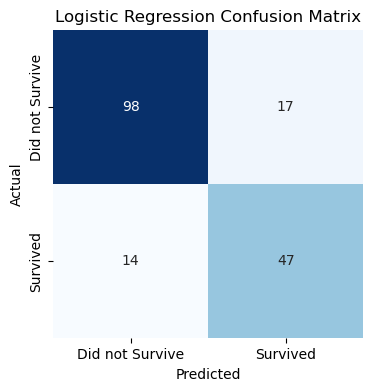

Logistic Regression Feature Coefficients:
    Feature  Coefficient
1       Sex     1.223327
5      Fare     0.231994
6  Embarked     0.172823
4     Parch    -0.066227
3     SibSp    -0.408028
2       Age    -0.591742
0    Pclass    -0.822862
Decision Tree Performance
Accuracy: 0.7557
Recall: 0.7213
Precision: 0.6286
F1 Score: 0.6718


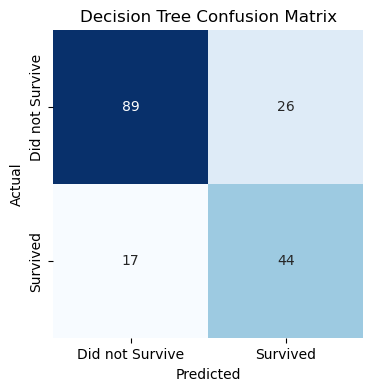


Decision Tree Feature Importance:
    Feature  Importance
1       Sex    0.302881
2       Age    0.272255
5      Fare    0.213509
0    Pclass    0.100124
3     SibSp    0.061886
4     Parch    0.029692
6  Embarked    0.019654


In [12]:
from sklearn.preprocessing import StandardScaler

# Logistic Regression
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lg = LogisticRegression(max_iter=1000, random_state=42)
lg.fit(X_train_scaled, y_train)

y_pred = lg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("cfm_lr")
plt.show()

# Extract coefficients
lg_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Feature Coefficients:")
print(lg_coef)

# Decision Tree
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Decision Tree Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('cfm_dt')
plt.show()

# Extract feature importance
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nDecision Tree Feature Importance:")
print(dt_importance)